In [123]:
import pandas as pd
import geopandas
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt


In [124]:
df=pd.read_csv('VEoRide_DataFormat_3.csv',header=0)

In [262]:
df=pd.read_csv('trajclean-coord.csv',header=0)

In [120]:
dp=pd.read_csv('baduuids.csv',header=0)

In [307]:
df=pd.read_csv('trajdims.csv',header=0)

In [121]:
print(dp[1:40])

     660787ab-f66d-5518-930b-862591245447
1    0f9106c2-a6e6-54ef-9fbe-0fc284ce308b
2    eca0bca2-3bb9-57db-9656-aba4edfb082d
3    ade20754-9c0d-5702-a7c7-976199bb4a37
4    b31932ca-5f26-5318-af66-257178892442
5    74cab76e-9847-5c77-a5c6-66eae848b890
6    48e36c88-402f-5f0f-ac7b-555c733ce45e
7    bc883c02-e900-5a02-ae17-4f8896827080
8    4c25dd92-f465-5844-a733-4246239999cb
9    874adf71-415c-5403-9dae-6c036e0486cf
10   2f9309fe-0a74-51f5-b820-6d858521fe51
11   91faf3ab-4573-5e9d-9639-c3507838c31d
12   1619a4e1-a54c-5f99-bf7b-051f68b70da7
13   1657050e-31a9-5baa-9be5-976944b866e4
14   de5ba369-aa33-56b0-97ba-4fd4a6863f45
15   2f9f2ab0-07a1-59ed-99a7-a4520d9bebd6
16   3ba6bd3c-eb93-5389-ac68-9ad402563194
17   c980881f-a485-5b20-b109-d3053ce53f4c
18   034cbc22-d0ac-5e47-b62b-ab259533e272
19   a4240371-736a-588a-9311-d72258ba5009
20   3d5d73b9-e498-5779-b207-43656f1bbc0e
21   d81310fc-a4ed-52f8-83c2-5a842bb6857d
22   2c0319b7-5883-56ea-bcb1-c0af96a2f838
23   58e55b86-f826-54d3-ab2b-f1f31

In [296]:

g1=df.groupby( [ "hour"] ).to_frame(name = 'end_lon').reset_index() 


AttributeError: 'DataFrameGroupBy' object has no attribute 'to_frame'

In [286]:
print(len(g1.index))

24


In [295]:
g1.head()

hour  end_lon
0     0      920
1     1      985
2     2     1015
3     3      906
4     4      922

In [308]:
df.dtypes

trip_id        object
trip_date      object
trip_time      object
start_lon     float64
end_lon       float64
start_lat     float64
end_lat       float64
dow             int64
months          int64
dayhr           int64
vcount          int64
length_m      float64
movedist_m    float64
len2dist      float64
rotund        float64
dtype: object

In [138]:
df.isna().sum()

trip_id      0
trip_date    0
trip_time    0
start_lon    0
end_lon      0
start_lat    0
end_lat      0
length_m     0
start        0
end          0
traj         0
dtype: int64

In [139]:
cluster.DBSCAN().get_params()

{'algorithm': 'auto',
 'eps': 0.5,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 5,
 'n_jobs': None,
 'p': None}

In [448]:
#now lets look at the start point

h1=df[df['dayhr'] == 1]#saturday
data=h1.loc[:,['end_lon','end_lat']]

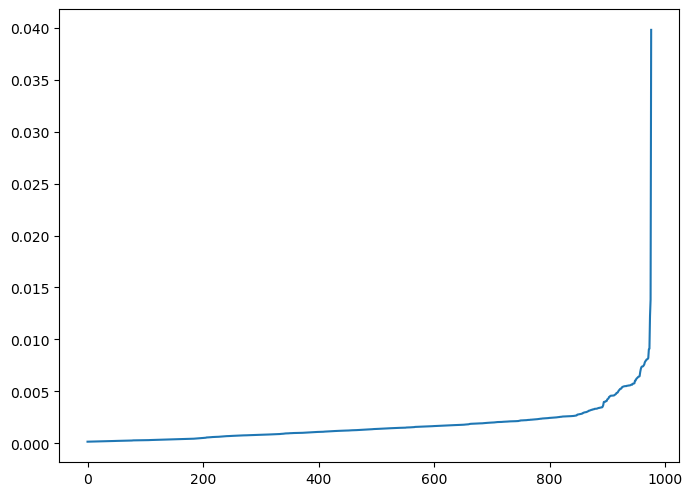

In [449]:
nbrs=NearestNeighbors(n_neighbors=20).fit(data)  #find nearby 50
distances,indices=nbrs.kneighbors(data)  #calculate distance of these 50
dist=distances[:,19]
dist_=np.sort(dist)
plt.plot(dist_)


1.5253783372769543


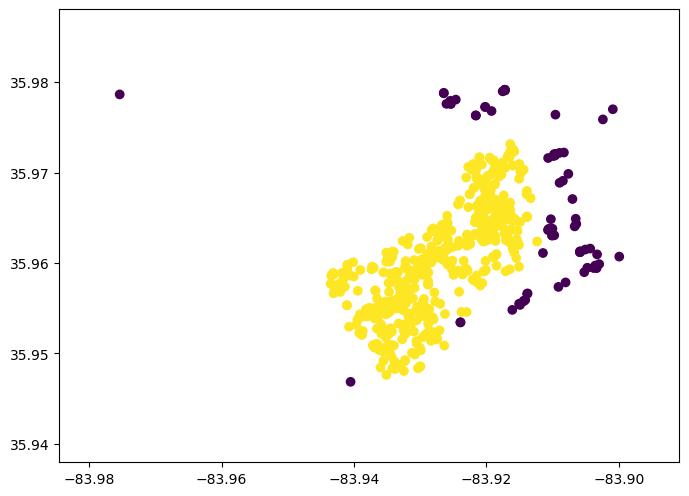

In [450]:
mdl_dbscan=cluster.DBSCAN(eps=0.003,min_samples=20).fit(data)
count=pd.Series(mdl_dbscan.labels_).value_counts()  #show how many clusters
plt.figure()
plt.scatter(x='end_lon',y='end_lat',data=data,c=mdl_dbscan.labels_)
print(metrics.davies_bouldin_score(data,mdl_dbscan.labels_))

In [451]:
from sklearn.cluster import KMeans
mdl_kmeans=KMeans(n_clusters=10).fit(data)

In [452]:
count2=pd.Series(mdl_kmeans.labels_).value_counts() # count each slusters value

In [453]:
km_centor=pd.DataFrame(mdl_kmeans.cluster_centers_,columns=['end_lon','end_lat'])

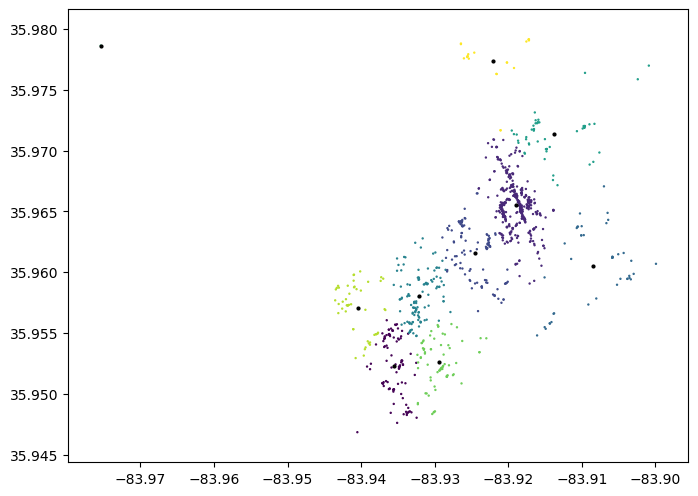

In [454]:
plt.rcParams['savefig.dpi']=300 
plt.rcParams['figure.dpi'] = 100 
plt.rcParams['figure.figsize']=(8.0,6.0) 
plt.figure()
plt.scatter(x='end_lon',y='end_lat',data=data,c=mdl_kmeans.labels_ ,s=0.5) 
plt.scatter(x='end_lon',y='end_lat',data=km_centor,c='k',s=4)
#plt.scatter(x='end_lon',y='end_lat',data=center_10_cordinate,c='r',marker='*',s=20)
plt.savefig('knoxscooter.png')


In [455]:
mdl_kmeans.cluster_centers_  

array([[-83.93548922,  35.95228042],
       [-83.91900917,  35.96549952],
       [-83.92455795,  35.96162412],
       [-83.90842849,  35.96048924],
       [-83.93209031,  35.95801879],
       [-83.91376574,  35.97135465],
       [-83.97539833,  35.978644  ],
       [-83.92944935,  35.95258389],
       [-83.94044254,  35.9570267 ],
       [-83.92201313,  35.97737293]])

In [456]:
center_20=list(count2.index[:5]) #calculate the top 10 cluster center
center_20_cordinate=[]
for index in center_20:
    cordinate=mdl_kmeans.cluster_centers_[index]
    print(cordinate)
    center_20_cordinate.append(cordinate)


[-83.91900917  35.96549952]
[-83.93209031  35.95801879]
[-83.92455795  35.96162412]
[-83.93548922  35.95228042]
[-83.92944935  35.95258389]


In [457]:
#now lets look at the start point




In [437]:
data=h1.loc[:,['start_lon','start_lat']]

In [329]:
print(data)

       start_lon  start_lat
1     -83.927342  35.953604
21    -83.908773  35.969487
76    -83.929120  35.952367
80    -83.935275  35.961182
84    -83.937037  35.959125
...          ...        ...
20908 -83.925816  35.961421
20912 -83.917236  35.965383
20959 -83.918487  35.961917
20969 -83.916590  35.970128
20980 -83.931386  35.954440

[977 rows x 2 columns]


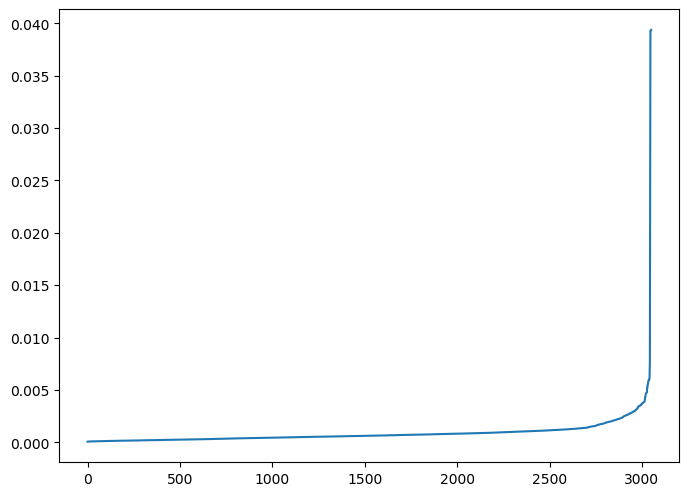

In [438]:
nbrs=NearestNeighbors(n_neighbors=20).fit(data)  #find nearby 50
distances,indices=nbrs.kneighbors(data)  #calculate distance of these 50
dist=distances[:,19]
dist_=np.sort(dist)
plt.plot(dist_)

In [416]:
data.shape

(3156, 2)

In [439]:
mdl_dbscan=cluster.DBSCAN(eps=0.003,min_samples=20).fit(data)
count=pd.Series(mdl_dbscan.labels_).value_counts()  #show how many clusters


2.0063908986720937


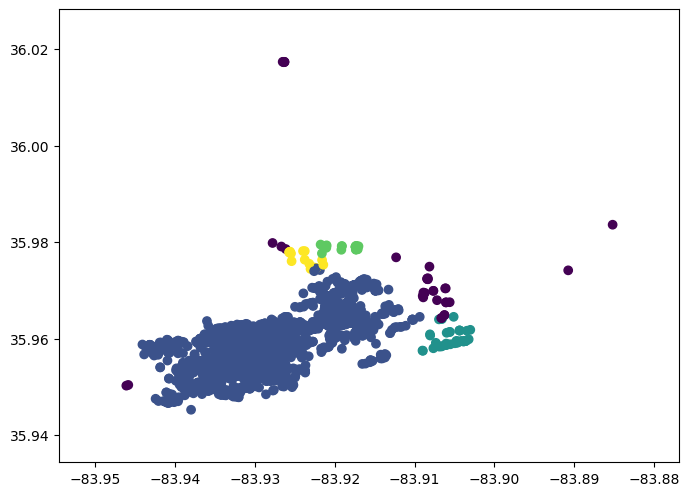

In [440]:
plt.figure()
plt.scatter(x='start_lon',y='start_lat',data=data,c=mdl_dbscan.labels_)
print(metrics.davies_bouldin_score(data,mdl_dbscan.labels_))

In [441]:
from sklearn.cluster import KMeans
mdl_kmeans=KMeans(n_clusters=10).fit(data)

In [442]:
count2=pd.Series(mdl_kmeans.labels_).value_counts() # count each slusters value

In [443]:
km_centor=pd.DataFrame(mdl_kmeans.cluster_centers_,columns=['start_lon','start_lat'])

In [444]:
plt.rcParams['savefig.dpi']=300 
plt.rcParams['figure.dpi'] = 100 
plt.rcParams['figure.figsize']=(8.0,6.0) 
plt.figure()


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

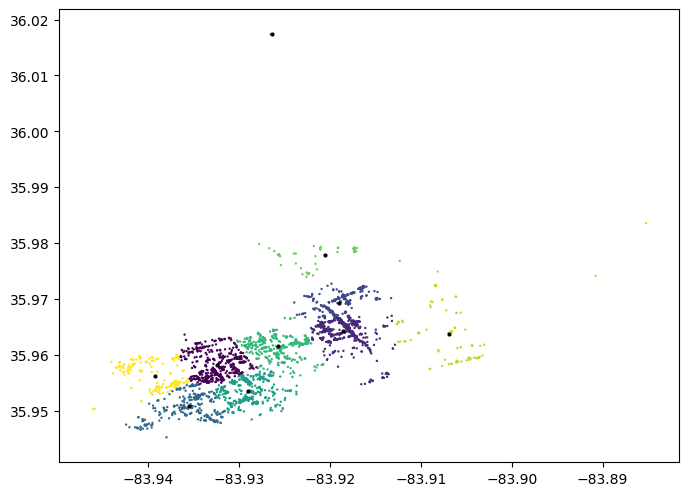

In [445]:
plt.scatter(x='start_lon',y='start_lat',data=data,c=mdl_kmeans.labels_ ,s=0.5) 
plt.scatter(x='start_lon',y='start_lat',data=km_centor,c='k',s=4)
#plt.scatter(x='end_lon',y='end_lat',data=center_10_cordinate,c='r',marker='*',s=20)
plt.savefig('knoxscooter_start.png')

In [446]:
mdl_kmeans.cluster_centers_  

array([[-83.9324083 ,  35.95820039],
       [-83.91850607,  35.96423833],
       [-83.91899297,  35.96918788],
       [-83.93554149,  35.95081592],
       [-83.92635657,  36.01734587],
       [-83.9290402 ,  35.95343637],
       [-83.92575203,  35.96149843],
       [-83.92057524,  35.97780214],
       [-83.90690991,  35.96380022],
       [-83.93927624,  35.95626661]])

In [447]:
center_10=list(count2.index[:5]) #calculate the top 5 cluster center of start location
center_10_cordinate=[]
for index in center_10:
    cordinate=mdl_kmeans.cluster_centers_[index]
    print(cordinate)
    center_10_cordinate.append(cordinate)


[-83.91850607  35.96423833]
[-83.9324083   35.95820039]
[-83.9290402   35.95343637]
[-83.92575203  35.96149843]
[-83.93554149  35.95081592]


In [209]:

from datetime import datetime
import pygeohash
import seaborn as sns
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import calendar

In [182]:
!pip install pygeohash

  Created wheel for pygeohash: filename=pygeohash-1.2.0-py2.py3-none-any.whl size=6163 sha256=0c60382221c65413585e1a86593f9243495d8f21c558ffecadfa5c0c70fb3227
  Stored in directory: /Users/fan/Library/Caches/pip/wheels/e2/ed/86/be7141d743cfb4aebac76406187154cd78fe9e6535d872187a
Successfully built pygeohash


In [184]:
df.head()

trip_id   trip_date trip_time  start_lon  \
0  3754d6ea-9f58-54c4-b7cb-d1103da08274  2020-02-26  14:04:38 -83.928796   
1  c2a5a127-2347-506c-8ee5-23db5d030762  2019-12-05  01:49:27 -83.927342   
2  bea21a63-9078-58fc-8d2d-d80d79b5f0d5  2019-11-29  14:09:44 -83.911242   
3  70448c95-d019-5698-af58-43d1c764f903  2020-02-19  16:33:22 -83.932319   
4  3a5a071d-42dd-50ae-96d6-e97507321baf  2020-02-19  13:57:40 -83.924889   

     end_lon  start_lat    end_lat    length_m  \
0 -83.926350  35.958079  35.960463  423.378607   
1 -83.932263  35.953604  35.956457  636.783769   
2 -83.911843  35.966455  35.966165   63.849513   
3 -83.938317  35.952516  35.952263  730.080231   
4 -83.927549  35.952634  35.953663  395.640485   

                             start                              end  \
0    POINT(-83.928796 35.95807867)     POINT(-83.92635 35.96046267)   
1  POINT(-83.92734183 35.95360367)  POINT(-83.93226283 35.95645667)   
2  POINT(-83.91124217 35.96645533)      POINT(-83.911843 35.966165)   
3    POINT(-83.93231917 35.952516)    POINT(-83.93831717 35.952263)   
4   POINT(-83.92488867 35.9526345)  POINT(-83.92754917 35.95366267)   

                                                traj  
0  LINESTRING(-83.928796 35.9580786666667,-83.928...  
1  LINESTRING(-83.9273418333333 35.9536036666667,...  
2  LINESTRING(-83.9112421666667 35.9664553333333,...  
3  LINESTRING(-83.9323191666667 35.952516,-83.932...  
4  LINESTRING(-83.9248886666667 35.9526345,-83.92...

In [137]:
df.shape

(21574, 11)

In [133]:
df.start_lon.unique().size # unique pick up start

19796

In [265]:
df['weekday'] = pd.to_datetime(df['trip_date']).dt.weekday

In [221]:
print(df['weekday'])

0        2
1        3
2        4
3        2
4        2
        ..
21569    5
21570    5
21571    3
21572    5
21573    6
Name: weekday, Length: 21574, dtype: int64


In [230]:
df['weekday'].unique()

array([2, 3, 4, 5, 0, 6, 1])

In [266]:
df["hour"] = pd.to_datetime(df['trip_time']).dt.hour

In [223]:
print(df['hour'])

0        14
1         1
2        14
3        16
4        13
         ..
21569    19
21570    22
21571     9
21572    22
21573     0
Name: hour, Length: 21574, dtype: int64


In [267]:
print(df['trip_date'].unique())

['2020-02-26' '2019-12-05' '2019-11-29' '2020-02-19' '2020-01-18'
 '2019-08-26' '2019-07-07' '2019-12-19' '2019-09-05' '2020-02-16'
 '2019-10-04' '2019-12-08' '2019-11-18' '2019-05-24' '2019-06-16'
 '2020-03-01' '2020-03-02' '2019-05-17' '2019-10-01' '2020-03-04'
 '2019-10-07' '2019-09-23' '2019-09-30' '2020-01-05' '2019-05-23'
 '2019-05-28' '2019-09-17' '2019-09-25' '2020-01-14' '2020-03-03'
 '2020-03-07' '2019-09-18' '2019-09-21' '2019-11-25' '2019-06-12'
 '2020-03-05' '2019-09-06' '2019-11-23' '2020-03-06' '2019-12-24'
 '2019-12-27' '2019-12-04' '2019-05-18' '2019-12-09' '2020-01-15'
 '2019-10-17' '2019-10-10' '2019-05-31' '2020-01-04' '2019-10-08'
 '2019-07-13' '2019-06-26' '2019-09-08' '2019-06-01' '2019-12-16'
 '2019-08-16' '2019-06-02' '2020-03-09' '2019-06-03' '2019-08-19'
 '2019-10-25' '2019-06-04' '2019-05-22' '2019-09-02' '2019-06-05'
 '2019-08-24' '2019-10-15' '2019-08-25' '2019-10-16' '2019-05-20'
 '2019-06-08' '2020-01-19' '2019-09-26' '2020-01-29' '2019-05-29'
 '2020-01-

In [225]:
hour_group = df.groupby("hour")

In [227]:
hour_group["trip_id"].count().sort_values(ascending=False)

hour
16    1085
15    1062
19    1041
17    1025
12    1021
13    1021
11    1018
2     1015
23    1007
21    1002
14    1000
18     989
22     989
1      985
20     983
4      922
0      920
3      906
5      843
6      770
10     603
7      592
8      402
9      373
Name: trip_id, dtype: int64

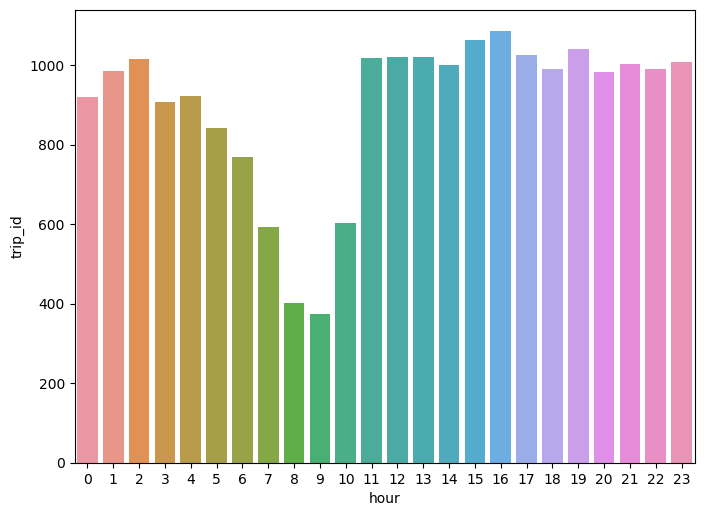

In [268]:
hour_num_df = hour_group.agg({"trip_id":"count"}).reset_index()
sns.barplot(x = "hour",y = "trip_id",data =hour_num_df )

In [269]:
df.loc[(df["weekday"]==5) | (df["weekday"]==6),"isWeekend"]=1
df.loc[~((df["weekday"]==5) | (df["weekday"]==6)),"isWeekend"]=0

# calculate weekday and weenkend
w = df[(df["isWeekend"]==1) & (df["weekday"]>=5)]["trip_date"].unique().size
c = df[(df["isWeekend"]==0) & (df["weekday"] <5)]["trip_date"].unique().size

print("weekend:",w)
print("weekday:",c)


weekend: 82
weekday: 211


In [282]:
g1 = df.groupby(["isWeekend","hour"])
temp_df = pd.DataFrame(g1['trip_id'].count()).reset_index()
temp_df.loc[temp_df['isWeekend'] == 0.0,'trip_id'] = temp_df['trip_id'] / c
temp_df.loc[temp_df['isWeekend'] == 1.0,'trip_id'] = temp_df['trip_id'] / w
ax=sns.barplot(x = 'hour',y ="trip_id" ,hue = "isWeekend",data = temp_df)
ax.set_ylabel("Count")
labels=["Weekday","Weekend"]
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="")


In [274]:
print(pd.DataFrame(g1))

            0                                                  1
0    (0.0, 0)                                      trip_id   ...
1    (0.0, 1)                                      trip_id   ...
2    (0.0, 2)                                      trip_id   ...
3    (0.0, 3)                                      trip_id   ...
4    (0.0, 4)                                      trip_id   ...
5    (0.0, 5)                                      trip_id   ...
6    (0.0, 6)                                      trip_id   ...
7    (0.0, 7)                                      trip_id   ...
8    (0.0, 8)                                      trip_id   ...
9    (0.0, 9)                                      trip_id   ...
10  (0.0, 10)                                      trip_id   ...
11  (0.0, 11)                                      trip_id   ...
12  (0.0, 12)                                      trip_id   ...
13  (0.0, 13)                                      trip_id   ...
14  (0.0, 14)            

In [276]:
g1.head()

trip_id   trip_date trip_time  start_lon  \
0     3754d6ea-9f58-54c4-b7cb-d1103da08274  2020-02-26  14:04:38 -83.928796   
1     c2a5a127-2347-506c-8ee5-23db5d030762  2019-12-05  01:49:27 -83.927342   
2     bea21a63-9078-58fc-8d2d-d80d79b5f0d5  2019-11-29  14:09:44 -83.911242   
3     70448c95-d019-5698-af58-43d1c764f903  2020-02-19  16:33:22 -83.932319   
4     3a5a071d-42dd-50ae-96d6-e97507321baf  2020-02-19  13:57:40 -83.924889   
...                                    ...         ...       ...        ...   
992   36ebaeda-792b-5f1f-aac9-c079a81a8827  2019-05-18  03:41:10 -83.929243   
994   a1740d7b-885c-56a4-b394-48300d8190d1  2019-05-18  12:03:53 -83.919557   
998   85df5adc-9e08-50f8-9fbf-f3cc298e8f50  2019-05-18  04:36:05 -83.920629   
1001  3e671227-77fe-5a7e-bdf3-b082a09e97cb  2019-05-18  04:50:43 -83.920014   
1007  ca2f632b-68c3-5051-b636-d1378092c29c  2019-05-18  03:24:11 -83.940288   

        end_lon  start_lat    end_lat      length_m  \
0    -83.926350  35.958079  35.960463    423.378607   
1    -83.932263  35.953604  35.956457    636.783769   
2    -83.911843  35.966455  35.966165     63.849513   
3    -83.938317  35.952516  35.952263    730.080231   
4    -83.927549  35.952634  35.953663    395.640485   
...         ...        ...        ...           ...   
992  -83.919230  35.960418  35.960683   5057.058766   
994  -83.919558  35.962973  35.962697     58.529061   
998  -83.934835  35.965747  35.955686   4806.963261   
1001 -83.920540  35.963801  35.965602  12599.199834   
1007 -83.940525  35.959313  35.959211   4577.100528   

                                start                              end  \
0       POINT(-83.928796 35.95807867)     POINT(-83.92635 35.96046267)   
1     POINT(-83.92734183 35.95360367)  POINT(-83.93226283 35.95645667)   
2     POINT(-83.91124217 35.96645533)      POINT(-83.911843 35.966165)   
3       POINT(-83.93231917 35.952516)    POINT(-83.93831717 35.952263)   
4      POINT(-83.92488867 35.9526345)  POINT(-83.92754917 35.95366267)   
...                               ...                              ...   
992   POINT(-83.92924283 35.96041817)     POINT(-83.91923 35.96068317)   
994   POINT(-83.91955717 35.96297283)  POINT(-83.91955767 35.96269733)   
998     POINT(-83.920629 35.96574733)     POINT(-83.9348355 35.955686)   
1001  POINT(-83.92001433 35.96380133)  POINT(-83.92054033 35.96560217)   
1007      POINT(-83.940288 35.959313)  POINT(-83.94052483 35.95921133)   

                                                   traj  weekday  hour  \
0     LINESTRING(-83.928796 35.9580786666667,-83.928...        2    14   
1     LINESTRING(-83.9273418333333 35.9536036666667,...        3     1   
2     LINESTRING(-83.9112421666667 35.9664553333333,...        4    14   
3     LINESTRING(-83.9323191666667 35.952516,-83.932...        2    16   
4     LINESTRING(-83.9248886666667 35.9526345,-83.92...        2    13   
...                                                 ...      ...   ...   
992   LINESTRING(-83.9292428333333 35.9604181666667,...        5     3   
994   LINESTRING(-83.9195571666667 35.9629728333333,...        5    12   
998   LINESTRING(-83.920629 35.9657473333333,-83.920...        5     4   
1001  LINESTRING(-83.9200143333333 35.9638013333333,...        5     4   
1007  LINESTRING(-83.940288 35.959313,-83.939997 35....        5     3   

      isWeekend  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
...         ...  
992         1.0  
994         1.0  
998         1.0  
1001        1.0  
1007        1.0  

[240 rows x 14 columns]

In [248]:
#involve the distance now
df["length_m"].describe()

count    21574.000000
mean      2407.875165
std       3155.774906
min          0.000000
25%        572.068588
50%       1116.696138
75%       2741.146590
max      44115.230177
Name: length_m, dtype: float64

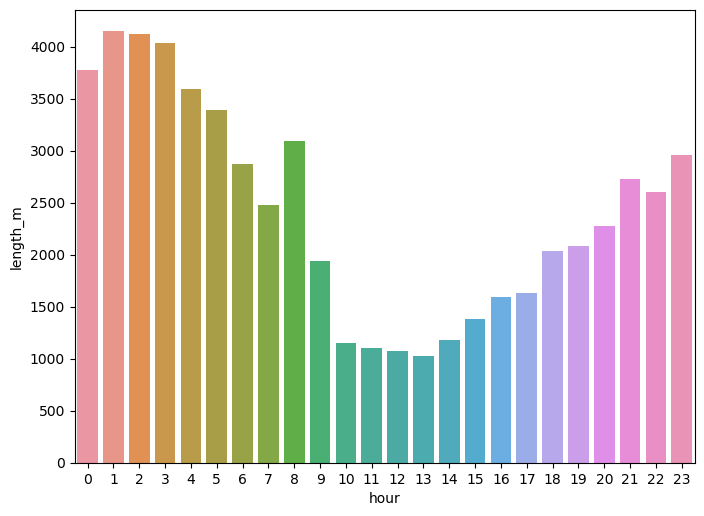

In [256]:
hour_group = df.groupby("hour")
hour_distance = hour_group.agg({"length_m":"mean"}).reset_index()
sns.barplot(x='hour',y='length_m',data=hour_distance)
